<a href="https://colab.research.google.com/github/Sunny1729-prog/Data-Science-and-Machine-Learning/blob/main/%24_Assignment_7(DS%26ML)(Name%3DSunny_Kumar)3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

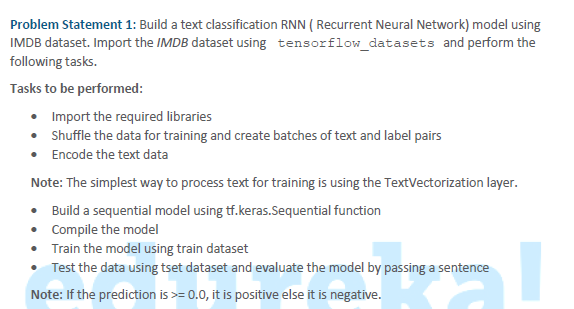

In [ ]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Embedding,LSTM,Dense,Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import imdb
from keras.preprocessing import sequence
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import string
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
data = pd.read_csv("/content/IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
x = data['review']
y = data['sentiment']

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)
punct=string.punctuation

In [ ]:
def clean(sentence):
  doc = nlp(sentence)

  tokens = [] 
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)
 
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [ ]:
clean("Hey you, stop there!")

['hey', 'stop']

In [ ]:
tfidf = TfidfVectorizer(tokenizer=clean)
clf = LinearSVC()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 35)
x_train.shape, x_test.shape

((40000,), (10000,))

In [ ]:
classifier = Pipeline([('tfidf',tfidf), ('clf',clf)])

In [ ]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function clean at 0x7fb75f649c20>)),
                ('clf', LinearSVC())])

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5050
    positive       0.88      0.90      0.89      4950

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
accuracy_score(y_test, y_pred)

0.888

In [ ]:
classifier.predict(["best movie, just sarcastic"])

array(['positive'], dtype=object)

In [ ]:
classifier.predict(["The worse movie, I have seen in recent times"])

array(['negative'], dtype=object)

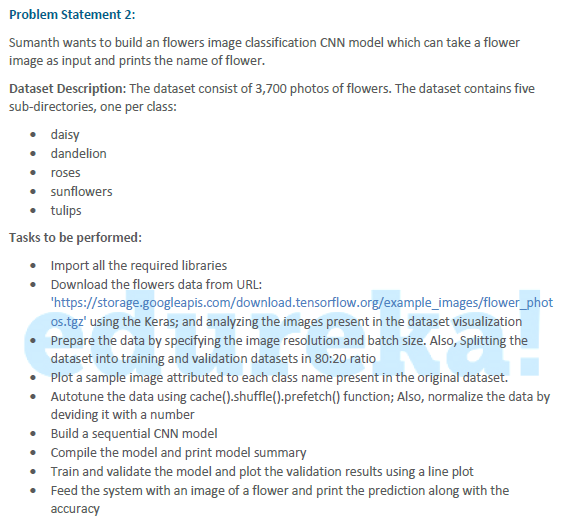

In [ ]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten,Dropout
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [ ]:
!unzip /content/drive/MyDrive/Datasets/flower.zip

Archive:  /content/drive/MyDrive/Datasets/flower.zip
replace flower/Test_set/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
height,width = 150,150
train_dir = "/content/flower/Train_set"
test_dir = "/content/flower/Test_set"
batch_size = 32
epochs = 15

In [ ]:
import tensorflow.keras.backend as k
k.image_data_format()

'channels_last'

In [ ]:
input_shape = (height,width,3)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator 

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255 , 
                                   rotation_range=0.2, zoom_range = 0.2,
                                   vertical_flip = True)

train_data = train_datagen.flow_from_directory(directory = train_dir, class_mode = 'categorical', target_size = (height,width))

Found 3456 images belonging to 5 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1.0/255)

test_data = test_datagen.flow_from_directory(directory = test_dir, class_mode = 'categorical', target_size = (height,width))

Found 861 images belonging to 5 classes.


In [ ]:
train_data.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

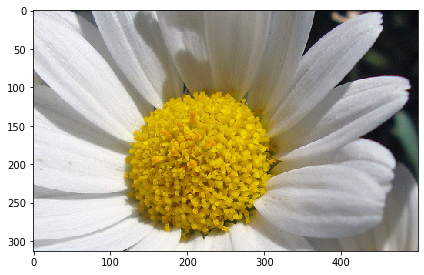

In [ ]:
from skimage.io import imshow
imshow("/content/flower/Train_set/daisy/10140303196_b88d3d6cec.jpg")
plt.show()

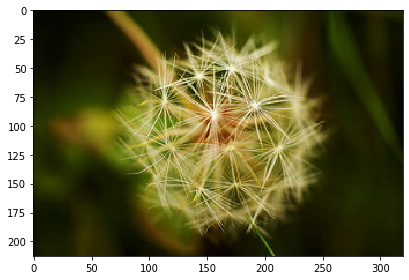

In [ ]:
from skimage.io import imshow
imshow("/content/flower/Train_set/dandelion/10043234166_e6dd915111_n.jpg")
plt.show()

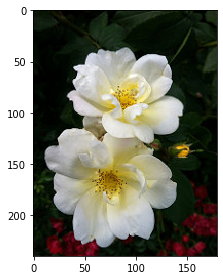

In [ ]:
from skimage.io import imshow
imshow("/content/flower/Train_set/rose/10090824183_d02c613f10_m.jpg")
plt.show()

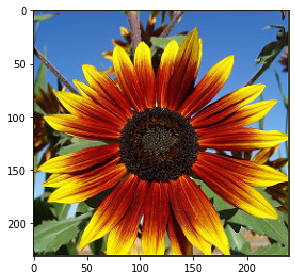

In [ ]:
from skimage.io import imshow
imshow("/content/flower/Train_set/sunflower/10386503264_e05387e1f7_m.jpg")
plt.show()

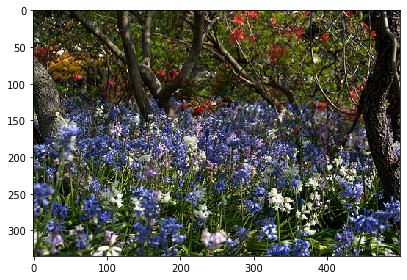

In [ ]:
from skimage.io import imshow
imshow("/content/flower/Train_set/tulip/10094729603_eeca3f2cb6.jpg")
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = (height,width,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Dropout(rate=0.5))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=5, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 36, 36, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 82944)            

In [ ]:
model.compile(loss = "categorical_crossentropy" ,
              optimizer = "rmsprop",
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,
           validation_data = test_data,
           epochs=15,
           batch_size=32)

Epoch 1/3
108/108 [==============================] - 221s 2s/step - loss: 1.3109 - accuracy: 0.4407 - val_loss: 1.0703 - val_accuracy: 0.5842
Epoch 2/3
108/108 [==============================] - 221s 2s/step - loss: 1.1121 - accuracy: 0.5489 - val_loss: 0.9833 - val_accuracy: 0.6330
Epoch 3/3
108/108 [==============================] - 223s 2s/step - loss: 1.0061 - accuracy: 0.6108 - val_loss: 0.8885 - val_accuracy: 0.6539


In [ ]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 15, 0, 1.5])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

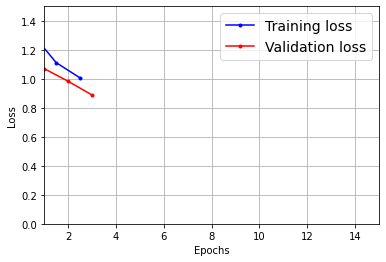

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
test_image = image.load_img('/content/tulip_test2.jpg',target_size=(height,width))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
train_data.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

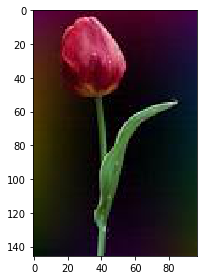

In [ ]:
from skimage.io import imshow
imshow("/content/tulip_test2.jpg")
plt.show()

In [ ]:
if result[0][0]==1:
    print('Daisy')
elif result[0][1]==1:
    print('Dandelion')
elif result[0][2]==1:
    print('Rose')
elif result[0][3]==1:
    print('SunFlower')
elif result[0][4]==1:
    print("Tulip")

Tulip
